In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def get_result_matrix(filename):
    f = open(filename, "r")
    sum_=0
    for x in f:
        if "mAP" in x:
            sum_+=1
    result=np.zeros((sum_,1))  
    f.close()
    
    f = open(filename, "r")
    sum_=0
    for x in f:
        if "mAP" in x and not "loading" in x:
            s1=x.find("mAP")+3
            s2=x.find("Acc")
            temp=float(x[s1:s2])
            result[sum_,0]=temp
            sum_+=1
#     print result
    index=result.nonzero()
    result=result[index]
#     print result.shape
    result=np.reshape(np.ravel(result), (sum_/4, 4))
    result=result.T
    f.close()
    return result

# filenames=["voc-ppi-res18-20181210_140305.log"]

# filenames=['voc-fine_tune-res18-20181208_082012.log',            
# 'voc-joint_train-res50-20181207_115208.log',       
# 'voc-ml_lwf_gpm-res18-20181209_133015.log',
# 'voc-fine_tune_aug_label-res18-20181208_023400.log',  
# 'voc-ml_lwf-res18-20181208_101815.log',            
# 'voc-ml_lwf_gpm-res18-20181209_134328.log',
# 'nopretrain-voc-ppi-res18-20181210_154707.log',  
# 'voc-gpm-res18-20181209_094431.log',                  
# 'voc-ml_lwf-res18-20181208_113823.log',            
# 'voc-ppi-res18-20181210_140305.log',
# 'voc-joint_train-res18-20181207_233824.log',          
# 'voc-ml_lwf-res18-20181208_223012.log',
# 'test-voc-ppi-res18-20181210_125325.log', 
# 'voc-joint_train-res34-20181206_212429.log',          
# 'voc-ml_lwf_aug_label-res18-20181208_005732.log']

# print len(filenames)
# for filename in filenames:
result=get_result_matrix('voc-lwf_ppi-res18-20181210_202650.log')
#     print result.shape
# print result.shape[1]

In [2]:
def result_process(result):
    result=result/100.
    number_epoch=result.shape[1]/3
#     print result.shape
    result0=result[:,0] #best model
    result1=result[:,number_epoch]
    result2=result[:,number_epoch*2]

    x1=np.arange(1,number_epoch)
    x2=np.arange(number_epoch+1,number_epoch*2)
    x3=np.arange(number_epoch*2+1,number_epoch*3)
    x=np.array([x1 ,x2, x3])
    x=x.reshape((1,number_epoch*3-3))
    result=result[:,x]
#     print result.shape
    result=result.reshape((4,number_epoch*3-3))
#     print result.shape
    return result,result0,result1,result2

# result,result0,result1,result2=result_process(result)

1
(4, 48)
48


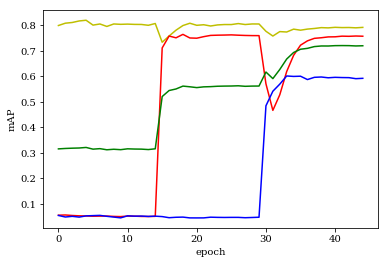

In [5]:
#%%%plot images for one

filenames=["voc-ppi-res18-20181210_140305.log"]
print len(filenames)
for filename in filenames:
    result=get_result_matrix(filename)
    print result.shape
print result.shape[1]
result,result0,result1,result2=result_process(result)

t=np.arange(result.shape[1])
plt.plot(t,result[0,:],'y',t,result[1,:] , 'r', t, result[2,:], 'b', t,  result[3,:], 'g')
plt.xlabel('epoch')
plt.ylabel('mAP')
plt.show()
# print result[3,-1]
# print result[3,:]
# print result2[-1]
# print result1[-1]
# print result0[-1]
# # print result0
# print result1
# print result2
# print result

In [59]:
# result_all={}
# result_all0,result_all1,result_all2={},{},{}
# models = ['finetune','LWF']
# for model in models:
#     result=get_result_matrix(filename)
#     result,result0,result1,result2=result_process(result)
#     result_all[model]=result
#     result_all0[model]=result0
#     result_all1[model]=result1
#     result_all2[model]=result2
    
#print result_all
# print result_all['finetune'][3,-1] 

0.7197067300000001


In [46]:
save_filename='Previous_Label_Unavailable'
result_all={}
result_all0,result_all1,result_all2={},{},{}
colors = {'Finetune': 'C0',
          'LWF': 'C1',
          'LWFPPI': 'C2',
          'LWFAUG': 'C3',
          'Joint': 'C4',
          'GEM': 'C5'}
models = ['Finetune','LWF','LWFPPI']
names_models = {'Finetune': 'Finetune',
                'LWF': 'LWF',
               'LWFPPI':'LWFPPI'}
filenames=['voc-finetune-res18-20181210_191931.log','voc-lwf-res18-20181210_195630.log','voc-lwf_ppi-res18-20181210_202650.log']

for model,filename in zip(models,filenames):
    print model,filename
    result=get_result_matrix(filename)
    result,result0,result1,result2=result_process(result)
    print result.shape
    result_all[model]=result
    result_all0[model]=result0
    result_all1[model]=result1
    result_all2[model]=result2

Finetune voc-finetune-res18-20181210_191931.log
(4, 45)
LWF voc-lwf-res18-20181210_195630.log
(4, 45)
LWFPPI voc-lwf_ppi-res18-20181210_202650.log
(4, 45)


In [17]:


# print result_all['finetune'][3,-1] 
# print result_all['LWF'][3,-1] 

In [48]:
save_filename='Previous_Label_Available'
result_all={}
result_all0,result_all1,result_all2={},{},{}
colors = {'Finetune': 'C0',
          'LWF': 'C1',
          'PPI': 'C2',
          'LWFAUG': 'C3',
          'Joint': 'C4',
          'GEM': 'C5'}
models = ['Finetune','LWF','PPI']
names_models = {'Finetune': 'Finetune',
                'LWF': 'LWF',
               'PPI':'PPI'}
filenames=['voc-finetune_aug-res18-20181210_193839.log','voc-lwf_aug-res18-20181210_210634.log','voc-ppi-res18-20181210_140305.log']

for model,filename in zip(models,filenames):
    print model,filename
    result=get_result_matrix(filename)
    result,result0,result1,result2=result_process(result)
    print result.shape
    result_all[model]=result
    result_all0[model]=result0
    result_all1[model]=result1
    result_all2[model]=result2

Finetune voc-finetune_aug-res18-20181210_193839.log
(4, 45)
LWF voc-lwf_aug-res18-20181210_210634.log
(4, 45)
PPI voc-ppi-res18-20181210_140305.log
(4, 45)


In [50]:
save_filename='Previous_Label_Available2'
result_all={}
result_all0,result_all1,result_all2={},{},{}
colors = {'Finetune': 'C0',
          'LWF': 'C1',
          'PPI': 'C2',
          'LWFAUGPPI': 'C3',
          'Joint': 'C4',
          'GEM': 'C5'}
models = ['Finetune','LWF','PPI','LWFAUGPPI']
names_models = {'Finetune': 'Finetune',
                'LWF': 'LWF',
               'PPI':'PPI',
               'LWFAUGPPI':'LWFAUGPPI'}
filenames=['voc-finetune_aug-res18-20181210_193839.log','voc-lwf_aug-res18-20181210_210634.log','voc-ppi-res18-20181210_140305.log','voc-lwf_aug_ppi-res18-20181210_220730.log']

for model,filename in zip(models,filenames):
    print model,filename
    result=get_result_matrix(filename)
    result,result0,result1,result2=result_process(result)
    print result.shape
    result_all[model]=result
    result_all0[model]=result0
    result_all1[model]=result1
    result_all2[model]=result2

Finetune voc-finetune_aug-res18-20181210_193839.log
(4, 45)
LWF voc-lwf_aug-res18-20181210_210634.log
(4, 45)
PPI voc-ppi-res18-20181210_140305.log
(4, 45)
LWFAUGPPI voc-lwf_aug_ppi-res18-20181210_220730.log
(4, 45)


In [52]:
save_filename='versus_Available_Unavailable'
result_all={}
result_all0,result_all1,result_all2={},{},{}
colors = {'Finetune': 'C0',
          'FinetuneAUG': 'C1',
          'LWF': 'C2',
          'LWFAUG': 'C3',
          'Joint': 'C4',
          'GEM': 'C5'}
models = ['Finetune','FinetuneAUG','LWF','LWFAUG']
names_models = {'Finetune': 'Finetune',
                'FinetuneAUG':'FinetuneAUG',
                'LWF': 'LWF',
               'LWFAUG':'LWFAUG'}
filenames=['voc-finetune-res18-20181210_191931.log','voc-finetune_aug-res18-20181210_193839.log','voc-lwf-res18-20181210_195630.log','voc-lwf_aug-res18-20181210_210634.log']

for model,filename in zip(models,filenames):
    print model,filename
    result=get_result_matrix(filename)
    result,result0,result1,result2=result_process(result)
    print result.shape
    result_all[model]=result
    result_all0[model]=result0
    result_all1[model]=result1
    result_all2[model]=result2
# print result_all

Finetune voc-finetune-res18-20181210_191931.log
(4, 45)
FinetuneAUG voc-finetune_aug-res18-20181210_193839.log
(4, 45)
LWF voc-lwf-res18-20181210_195630.log
(4, 45)
LWFAUG voc-lwf_aug-res18-20181210_210634.log
(4, 45)


In [54]:
save_filename='LWF_PPI_LWFPPI'
result_all={}
result_all0,result_all1,result_all2={},{},{}
colors = {'LWF': 'C0',
          'PPI': 'C1',
          'LWFPPI': 'C2',
          'LWFAUG': 'C3',
          'Joint': 'C4',
          'GEM': 'C5'}
models = ['LWF','PPI','LWFPPI']
names_models = {'LWF': 'LWF',
                'PPI':'PPI',
                'LWFPPI': 'LWFPPI'}
filenames=['voc-lwf-res18-20181210_195630.log','voc-ppi-res18-20181210_140305.log','voc-lwf_ppi-res18-20181210_202650.log']

for model,filename in zip(models,filenames):
    print model,filename
    result=get_result_matrix(filename)
    result,result0,result1,result2=result_process(result)
    print result.shape
    result_all[model]=result
    result_all0[model]=result0
    result_all1[model]=result1
    result_all2[model]=result2
# print result_all

LWF voc-lwf-res18-20181210_195630.log
(4, 45)
PPI voc-ppi-res18-20181210_140305.log
(4, 45)
LWFPPI voc-lwf_ppi-res18-20181210_202650.log
(4, 45)


In [65]:
save_filename='ALL'
result_all={}
result_all0,result_all1,result_all2={},{},{}
colors = {'Finetune': 'C0',
          'FinetuneAUG': 'C1',
          'LWF': 'C2',
#           'LWFAUG': 'C3',
          'PPI': 'C4',
          'LWFPPI': 'C3'}
models = ['Finetune','FinetuneAUG','LWF',"PPI","LWFPPI"] #"LWFAUG",
names_models = {'Finetune': "Finetune",
                'FinetuneAUG':"FinetuneAUG",
                'LWF': 'LWF',
#                 'LWFAUG': 'LWFAUG',
               'PPI':'PPI',
               'LWFPPI':'LWFPPI'} #'voc-lwf_aug-res18-20181210_210634.log',
filenames=['voc-finetune-res18-20181210_191931.log','voc-finetune_aug-res18-20181210_193839.log','voc-lwf-res18-20181210_195630.log','voc-ppi-res18-20181210_140305.log','voc-lwf_ppi-res18-20181210_202650.log']

for model,filename in zip(models,filenames):
    print model,filename
    result=get_result_matrix(filename)
    result,result0,result1,result2=result_process(result)
    print result.shape
    result_all[model]=result
    result_all0[model]=result0
    result_all1[model]=result1
    result_all2[model]=result2
# print result_all

Finetune voc-finetune-res18-20181210_191931.log
(4, 45)
FinetuneAUG voc-finetune_aug-res18-20181210_193839.log
(4, 45)
LWF voc-lwf-res18-20181210_195630.log
(4, 45)
PPI voc-ppi-res18-20181210_140305.log
(4, 45)
LWFPPI voc-lwf_ppi-res18-20181210_202650.log
(4, 45)


/home/ubuntu/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/python2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/ubuntu/anaconda3/envs/python2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/ubuntu/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/python2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/an

['Finetune', 'FinetuneAUG', 'LWF', 'PPI', 'LWFPPI']
0.65147247
0.67466316
0.72771355
0.7197067300000001
0.72879684


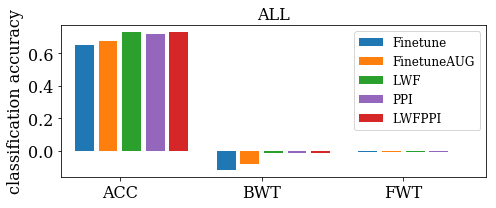

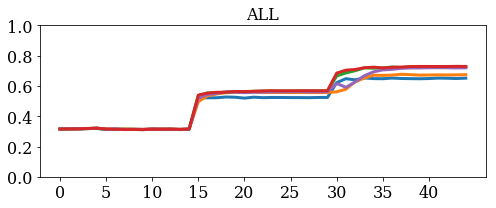

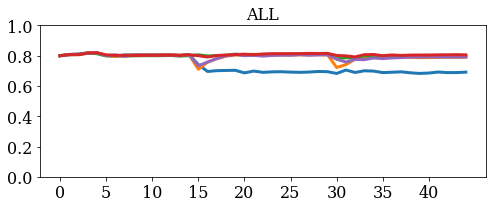

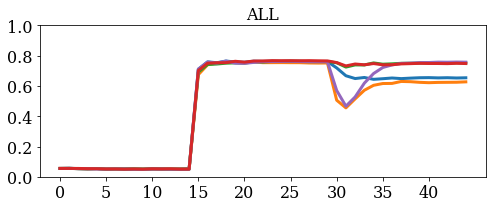

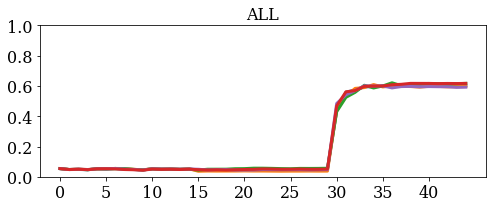

In [66]:
# Copyright 2017-present, Facebook, Inc.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.

import matplotlib as mpl
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
mpl.use('Agg')

# if 'roman' in mpl.font_manager.weight_dict.keys():
#     del mpl.font_manager.weight_dict['roman']
# mpl.font_manager._rebuild()

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.family"] = "DejaVu Serif"



# models = ['finetune','LWF']
datasets = ['Pascal_VOC']

names_datasets = {'Pascal_VOC': 'Pascal_VOC DataSet'}

print models


barplot = {}

for dataset in datasets:
    barplot[dataset] = {}
    for model in models:
        barplot[dataset][model] = {}
#         barplot[dataset][model]['acc'] = result[3,-1] 
#         barplot[dataset][model]['bwt'] = (result[1,-1]-result2[1]+result[0,-1]-result1[0])/2.
#         barplot[dataset][model]['fwt'] = (result1[1]-result0[1]+result1[2]-result0[2]+result2[2]-result0[2])/3.
        print result_all[model][3,-1] 
        barplot[dataset][model]['acc'] = result_all[model][3,-1] 

        barplot[dataset][model]['bwt'] = (result_all[model][1,-1]-result_all2[model][1]+result_all[model][0,-1]-result_all1[model][0])/2.
        barplot[dataset][model]['fwt'] = (result_all1[model][1]-result_all0[model][1]+result_all1[model][2]-result_all0[model][2]+result_all2[model][2]-result_all0[model][2])/3.

            

for dataset in datasets:
    x_lab = []
    y_acc = []
    y_bwt = []
    y_fwt = []

    for i, model in enumerate(models):
        if barplot[dataset][model] != {}:
            x_lab.append(model)
            y_acc.append(barplot[dataset][model]['acc'])
            y_bwt.append(barplot[dataset][model]['bwt'])
            y_fwt.append(barplot[dataset][model]['fwt'])
    x_ind = np.arange(len(y_acc))
    plt.figure(figsize=(7, 3))
    all_colors = []
    for xi, yi, li in zip(x_ind, y_acc, x_lab):
        plt.bar(xi, yi, label=names_models[li], color=colors[li])
        all_colors.append(colors[li])
    plt.bar(x_ind + (len(y_acc) + 1) * 1, y_bwt, color=all_colors)
    plt.bar(x_ind + (len(y_acc) + 1) * 2, y_fwt, color=all_colors)
    plt.xticks([len(models)/2-0.5,len(models)*3/2+0.5,len(models)*5/2+1.5], ['ACC', 'BWT', 'FWT'], fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(-1, len(y_acc) * 3 + 2)
    plt.ylabel('classification accuracy', fontsize=16)
    plt.title(save_filename, fontsize=16)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig('barplot_'+dataset+save_filename+'.pdf', bbox_inches='tight')
    # plt.show()

evoplot = {}

for dataset in datasets:
    evoplot[dataset] = {}
    for model in models:
        evoplot[dataset][model] = result_all[model][3,:]

for dataset in datasets:

    plt.figure(figsize=(7, 3))
    for model in models:
        if model in evoplot[dataset]:
            x = np.arange(len(evoplot[dataset][model]))
            plt.plot(x, evoplot[dataset][model], color=colors[model], lw=3)
            plt.xticks(range(0, 45, 5))

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0,1)
    #plt.xlabel('task number', fontsize=16)
    plt.title(save_filename, fontsize=16)
    plt.tight_layout()
    plt.savefig('evoplot_'+dataset+save_filename+'.pdf' , bbox_inches='tight')
    # plt.show()
    
    
evoplot = {}

for dataset in datasets:
    evoplot[dataset] = {}
    for model in models:
        evoplot[dataset][model] = result_all[model][0,:]

for dataset in datasets:

    plt.figure(figsize=(7, 3))
    for model in models:
        if model in evoplot[dataset]:
            x = np.arange(len(evoplot[dataset][model]))
            plt.plot(x, evoplot[dataset][model], color=colors[model], lw=3)
            plt.xticks(range(0, 45, 5))

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0,1)
    #plt.xlabel('task number', fontsize=16)
    plt.title(save_filename, fontsize=16)
    plt.tight_layout()
    plt.savefig('task1_evoplot_'+dataset+save_filename+'.pdf' , bbox_inches='tight')
    # plt.show()
    
evoplot = {}

for dataset in datasets:
    evoplot[dataset] = {}
    for model in models:
        evoplot[dataset][model] = result_all[model][1,:]

for dataset in datasets:

    plt.figure(figsize=(7, 3))
    for model in models:
        if model in evoplot[dataset]:
            x = np.arange(len(evoplot[dataset][model]))
            plt.plot(x, evoplot[dataset][model], color=colors[model], lw=3)
            plt.xticks(range(0, 45, 5))

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0,1)
    #plt.xlabel('task number', fontsize=16)
    plt.title(save_filename, fontsize=16)
    plt.tight_layout()
    plt.savefig('task2_evoplot_'+dataset+save_filename+'.pdf' , bbox_inches='tight')
    # plt.show()
    
evoplot = {}

for dataset in datasets:
    evoplot[dataset] = {}
    for model in models:
        evoplot[dataset][model] = result_all[model][2,:]

for dataset in datasets:

    plt.figure(figsize=(7, 3))
    for model in models:
        if model in evoplot[dataset]:
            x = np.arange(len(evoplot[dataset][model]))
            plt.plot(x, evoplot[dataset][model], color=colors[model], lw=3)
            plt.xticks(range(0, 45, 5))

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0,1)
    #plt.xlabel('task number', fontsize=16)
    plt.title(save_filename, fontsize=16)
    plt.tight_layout()
    plt.savefig('task3_evoplot_'+dataset+save_filename+'.pdf' , bbox_inches='tight')
    # plt.show()